<a href="https://colab.research.google.com/github/T81oub/COEVOLUTIONARY-LEARNING-SPATIALLY-DISTRIBUTED-POPULATIONS-/blob/main/ANN_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANN** (Artificial Neural Network) for MNIST is a machine learning model that can be used to recognize handwritten digits in images from the MNIST dataset. The MNIST dataset is a collection of 28x28 grayscale images of handwritten digits from 0 to 9, with a total of 60,000 training examples and 10,000 test examples.

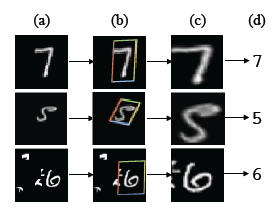

1.   Import the required libraries, including TensorFlow or Keras, which provide a high-level API for building and training neural networks.
2.   Load the MNIST dataset, which can be downloaded from various sources, such as TensorFlow Datasets or Kaggle.
3.   Preprocess the data by scaling the pixel values to be between 0 and 1, and converting the labels to one-hot encoding.
4.   Define the architecture of the neural network, including the number of layers, the number of neurons in each layer, and the activation functions. For example, a common architecture for MNIST is a feedforward neural network with an input layer, one or more hidden layers with ReLU activation, and an output layer with softmax activation.
5.   Compile the model by specifying the loss function, the optimizer, and the evaluation metric. For example, for MNIST classification, the categorical cross-entropy loss function is commonly used, along with the Adam optimizer and accuracy as the evaluation metric.
6.   Train the model by calling the fit() method, passing in the training data and labels, the batch size, the number of epochs, and the validation data. During training, the model will update its weights to minimize the loss on the training data.
7.   Evaluate the model on the test data using the evaluate() method, which returns the loss and evaluation metric on the test data.
8.   Make predictions on new data using the predict() method, which returns the model's output probabilities for each class. 



In [ ]:
#This is a Python code snippet that checks if the current environment is Google Colab and if so,
# switches to TensorFlow version 2.x. 
#If the environment is not Colab or if TensorFlow version 2.x is already installed, the code block is skipped
try:
  
  %tensorflow_version 2.x  # Colab only.The %tensorflow_version 2.x line is a special command in Colab that installs 
                           #and switches to TensorFlow version 2.x if it is not already installed.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


In [ ]:
#  imports the MNIST dataset from the Keras API.
mnist = tf.keras.datasets.mnist 
#loads the dataset into four NumPy arrays
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#normalizes the pixel values of the input images by dividing them by 255.0.
#preprocessing step to scale the pixel values to a range between 0 and 1.
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  #takes the 28x28 input images and flattens them into a 1-dimensional array of size 784.
  #This is necessary because the following layer, a dense layer, requires a 1D input.
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  #is a fully connected (dense) layer with 128 neurons and 
  # a rectified linear unit (ReLU):helps prevent the vanishing gradient problem.
  tf.keras.layers.Dense(128, activation='relu'),
  #drops out 20% of the input units during each training epoch. 
  #This is a regularization technique used to prevent overfitting 
  #and improve generalization performance of the model.
  tf.keras.layers.Dropout(0.2),
  #This layer maps the output from the previous layer to a probability distribution over 10 classes                 
  tf.keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
#compile the model
model.compile(optimizer='adam',#specifies the optimizer used to minimize the loss function during training.
                               #In this case, it is 'adam', which is a popular stochastic gradient descent optimization algorithm 
                               #that adapts the learning rate based on the gradients of the weights. Other options include 'sgd', 'rmsprop', and 'adagrad', among others.
              loss='sparse_categorical_crossentropy', #specifies the loss function used during training to measure how well the model is performing.
                                                      #In this case, it is 'sparse_categorical_crossentropy', which is commonly used for multi-class classification problems where the labels are integers. 
                                                      #'binary_crossentropy' for binary classification and 'mean_squared_error' for regression problems
              metrics=['accuracy']) #The metrics argument specifies the evaluation metrics 
                                    # used to monitor the performance of the model during training and testing. In this case, it is 'accuracy', which is a commonly used metric for classification problems

In [ ]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
#epochs: This parameter specifies the number of times the model should be trained 
#on the entire training dataset. One epoch means the model has seen all the training examples once.

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0411 - accuracy: 0.9864 - val_loss: 0.0659 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0389 - accuracy: 0.9869 - val_loss: 0.0660 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0355 - accuracy: 0.9876 - val_loss: 0.0691 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9885 - val_loss: 0.0759 - val_accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0312 - accuracy: 0.9893 - val_loss: 0.0756 - val_accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9890 - val_loss: 0.0799 - val_accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9901 - val_loss: 0.0761 - val_accuracy:

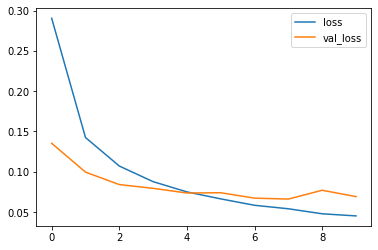

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

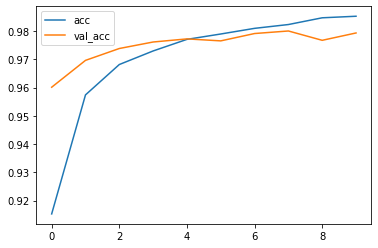

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
#Evaluate the model 
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9793
[0.06913013011217117, 0.9793000221252441]


313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization
[[ 973    1    1    1    0    0    2    1    1    0]
 [   0 1124    5    0    0    1    2    0    3    0]
 [   4    1 1014    3    0    0    2    5    3    0]
 [   1    0    5  988    0    7    0    3    4    2]
 [   0    0    1    0  961    0    6    2    2   10]
 [   2    0    1    6    1  872    5    1    3    1]
 [   4    3    0    1    4    4  941    0    0    1]
 [   0    6   16    0    0    0    0  995    3    8]
 [   4    0    5    4    5    3    3    4  942    4]
 [   3    4    0    3    8    2    0    5    1  983]]


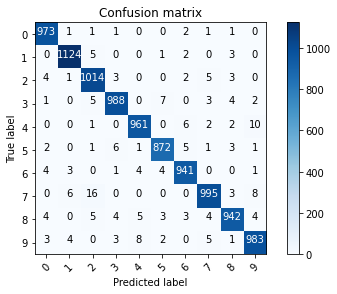

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

Text(0.5, 1.0, 'True label: 7 Predicted: 1')

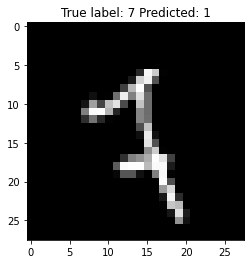

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))